<a href="https://colab.research.google.com/github/harish2190/Python_Repository/blob/main/Apache_PySpark_by_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [3]:
#!pip install pyspark==3.4.0
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=0915188a21287d25c3d71eb78819ec47543aa1f90caf3109100486338b17dda7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [99]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [8]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2024-02-24 06:42:17--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [                <=> ]   1.76G  3.23MB/s    in 9m 37s  

2024-02-24 06:51:55 (3.12 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1890086274]

total 1937272
-rw-r--r-- 1 root root   93668001 Feb 24 06:42  reported-crimes.csv
-rw-r--r-- 1 root root 1890086274 Feb 23 12:00 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Feb 22 14:24  sample_data


In [9]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1845796
-rw-r--r-- 1 root root 1890086274 Feb 23 12:00 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Feb 22 14:24 sample_data


In [11]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True)
rc.show(5)
#actual data from pyspark

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|     ASSAULT|              SIMPLE|               OTHER| false|   false|2422|   

In [13]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))
#converting date formet in 'Date' column
rc.show(5)
#actual data from pyspark

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|     ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     02

In [14]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
#converting date formet in 'Date' column and also filtering the data
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## (03-03) Schemas

In [16]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [17]:
from pyspark.sql.types import StructType, StructField,StringType,TimestampType,BooleanType,DoubleType,IntegerType

In [18]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [19]:
#Trying here to create a schema by giving field name, datatype and Nullable? values
#Its hard to create a schema by defining the datatypes for each variables in below code
schema=StructType([
 StructField('ID',StringType,True),
 StructField('Case Number',StringType,True),
 StructField('Date',TimestampType,True)
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location'
])
#We are going to declare using upcoming options

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-19-b7882e8992a5>, line 6)

In [23]:
#declared the datatype
labels=[
 ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
 ]

#creating schema using below line here we are adding Nullable=True for all columns
schema= StructType([StructField (x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [24]:
rc.printSchema()  ## Result of initial declarion

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [25]:
#declaring the schema of a dataframe using below command
rc = spark.read.csv('reported-crimes.csv',schema=schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [26]:
rc.show(5)
#in below example you can see date column not supprting the explicit data type assigned by us.

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|NULL|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|NULL|  

## (03-04) Working with columns

In [27]:
#Read the data from file
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
#converting date formet in 'Date' column and also filtering the data
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

**Display only the first 5 rows of the column name IUCR**

In [28]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



In [29]:
rc.select( rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



In [31]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [41]:
rc.select('Case Number', 'Date' , 'Arrest','Latitude').show(4)

+-----------+-------------------+------+--------+
|Case Number|               Date|Arrest|Latitude|
+-----------+-------------------+------+--------+
|   HN549294|2007-08-25 09:22:18| false|    NULL|
|   HH109118|2002-01-05 21:24:00|  true|    NULL|
|   JE293464|2011-08-10 00:01:00| false|    NULL|
|   JE439378|2015-09-24 00:00:00| false|    NULL|
+-----------+-------------------+------+--------+
only showing top 4 rows



In [39]:
rc.select('Case Number','Updated On').show(4)

+-----------+--------------------+
|Case Number|          Updated On|
+-----------+--------------------+
|   HN549294|08/17/2015 03:03:...|
|   HH109118|02/04/2016 06:33:...|
|   JE293464|09/14/2023 03:41:...|
|   JE439378|09/14/2023 03:41:...|
+-----------+--------------------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [42]:
from pyspark.sql.functions import lit
rc.withColumn('one',lit(1)).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|one|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|  

**Add a column with name beat, with entries all '0923**

In [45]:
rc.withColumn('Beat',lit('0923')).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|0923|     024|  49|             1|     08A|     

**Add a column with name Date, with entries all '2007-08-25 09:22:18**

In [46]:
rc.withColumn('Date',lit('2007-08-25 09:22:18')).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

**Remove the column IUCR**

In [47]:
rc=rc.drop('IUCR')

In [49]:
rc.show(5)
#IUCR column dropped

+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        NULL|        NULL

In [50]:
#Drop multiple columns
rc=rc.drop('Block','Primary Type','Description')
rc.show(5)

+--------+-----------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|               OTHER| false|   false|2422|     024|  49|             1|     08A|        NULL|        NULL|2007|08/17/2015 03:03:...|    NULL|     NULL|    NULL|
| 1930689|   HH109118|2002-01-05 21:24:00|         GAS STATION|  true|   false|0512|     005|NULL|          NULL|      06|        NULL|        NULL|2002|02/04/2016 06:33:...|    NULL|     

## (03-05) Working with rows

In [51]:
#Read the data from file
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
#converting date formet in 'Date' column and also filtering the data
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [54]:
#Number of Crime on 12-Nov-2018
one_day=spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

4

In [56]:
#adding one_day dataframe to rd dataframe
#Ordering the result by date column , so that newly added column will be in the top
#then show(5) to view the top 5 rows
rc.union(one_day).orderBy('Date',ascending=False).show(5)

#4 records from one_Day and 1 record from rc in below dataset result

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|    008XX E 63RD ST|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT| false| 

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [57]:
rc.groupBy('Primary Type').count().orderBy('Count',ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418529|
|            BATTERY|1232293|
|    CRIMINAL DAMAGE| 771523|
|          NARCOTICS| 711778|
|      OTHER OFFENSE| 419046|
|            ASSAULT| 418522|
|           BURGLARY| 388042|
|MOTOR VEHICLE THEFT| 314136|
| DECEPTIVE PRACTICE| 267293|
|            ROBBERY| 255604|
+-------------------+-------+
only showing top 10 rows



## (03-06) Challenge

In [58]:
rc.show(6)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OT

**What percentage of reported crimes resulted in an arrest?**

In [63]:
dis_arrest=rc.select('Arrest').distinct().show()
dis_arrest

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [64]:
Total_Record_count=rc.count()
Total_Record_count

6756937

In [70]:
Arrest_Record_count=rc.filter(col('Arrest')=='true').count()
Arrest_Record_count

1875306

In [71]:
Arrest_Percentage=(rc.filter(col('Arrest')=='true').count() / rc.select('Arrest').count())*100
Arrest_Percentage

27.753788439939576

  **What are the top 3 locations for reported crimes?**

In [72]:
rc.groupBy('Location Description').count().orderBy('Count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770638|
|           RESIDENCE|1146358|
|           APARTMENT| 699278|
+--------------------+-------+
only showing top 3 rows



## (04-01) Built-in functions

In [73]:
#Read the data from file
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
#converting date formet in 'Date' column and also filtering the data
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [74]:
from pyspark.sql import functions

In [75]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [76]:
from pyspark.sql.functions import lower,upper,substring
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [79]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [80]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|             assault|             ASSAULT|                         ASSA|
|               theft|               THEFT|                         THEF|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [85]:
from pyspark.sql.functions import min,max

In [86]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [87]:
from pyspark.sql.functions import date_add,date_sub

In [90]:
rc.select('Date',date_add(col('Date'),3),date_sub(col('Date'),3)).show(5)

+-------------------+-----------------+-----------------+
|               Date|date_add(Date, 3)|date_sub(Date, 3)|
+-------------------+-----------------+-----------------+
|2007-08-25 09:22:18|       2007-08-28|       2007-08-22|
|2002-01-05 21:24:00|       2002-01-08|       2002-01-02|
|2011-08-10 00:01:00|       2011-08-13|       2011-08-07|
|2015-09-24 00:00:00|       2015-09-27|       2015-09-21|
|2014-09-07 00:00:00|       2014-09-10|       2014-09-04|
+-------------------+-----------------+-----------------+
only showing top 5 rows



In [92]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3) ).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



## (04-02) Working with dates

In [96]:
from pyspark.sql.functions import to_date,to_timestamp,lit

  **2019-12-25 13:30:00**

In [109]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df=spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)


+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [111]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [115]:

df=spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [121]:
df=spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1)
df.select('Christmas',to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show(1)

+--------------------+
|           Christmas|
+--------------------+
|12/25/2019 01:30:...|
+--------------------+

+--------------------+-----------------------------------------+----------------------------------------------+
|           Christmas|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+--------------------+-----------------------------------------+----------------------------------------------+
|12/25/2019 01:30:...|                               2019-12-25|                           2019-12-25 13:30:00|
+--------------------+-----------------------------------------+----------------------------------------------+



In [124]:

nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|     ASSAULT|              SIMPLE|               OTHER| false|   false|2422|   

In [126]:
nrc.show(5,truncate=False) ## view values Without truncating the column values

+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                    |IUCR|Primary Type|Description                                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+--------------------

## (04-03) Joins

In [127]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
#converting date formet in 'Date' column and also filtering the data
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

**Download police station data**

In [128]:
## Datasets are available in below link
# https://data.cityofchicago.org/
#
!wget https://data.cityofchicago.org/resource/z8bn-74gv.csv
!ls -l

--2024-02-24 10:18:30--  https://data.cityofchicago.org/resource/z8bn-74gv.csv
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘z8bn-74gv.csv’

z8bn-74gv.csv           [ <=>                ]   6.22K  --.-KB/s    in 0s      

2024-02-24 10:18:31 (1.50 GB/s) - ‘z8bn-74gv.csv’ saved [6365]

total 1845804
-rw-r--r-- 1 root root 1890086274 Feb 23 12:00 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Feb 22 14:24 sample_data
-rw-r--r-- 1 root root       6365 Aug 19  2019 z8bn-74gv.csv


In [129]:
mv z8bn-74gv.csv police-station.csv

In [130]:
!ls -l

total 1845804
-rw-r--r-- 1 root root       6365 Aug 19  2019 police-station.csv
-rw-r--r-- 1 root root 1890086274 Feb 23 12:00 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Feb 22 14:24 sample_data


In [131]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [132]:
rc.cache()
rc.count()

6756937

In [133]:
ps.select(col('district')).distinct().show(30)

+------------+
|    district|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
| ","Chicago"|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
|          12|
|          14|
|           2|
+------------+



In [135]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|    NULL|
+--------+



In [136]:
from pyspark.sql.functions import lpad
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [138]:
#adding leading '0' in distict column in police station dataframe 'ps'
ps.select(lpad(col('district'),3,'0')).show()

+--------------------+
|lpad(district, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
+--------------------+
only showing top 20 rows



In [148]:
#add the new column in ps

ps=ps.withColumn('Format_district',lpad(col('district'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [152]:
rc.join(ps,rc.District==ps.Format_district,'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|district|district_name|             address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_dist

In [155]:
ps.columns

['district',
 'district_name',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
 'Format_district']

In [157]:
#will take district columns alone from police station dataframe and will drop remaining column
rc.join(ps,rc.District==ps.Format_district,'left_outer').drop( 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|district|district_name|Format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|  

In [166]:
#will take district columns alone from police station dataframe and will drop remaining column
jdf=rc.join(ps,rc.District==ps.Format_district,'left_outer')

jdf.select(rc.District,ps.district,'district_name').distinct().show()

+--------+--------+--------------+
|District|district| district_name|
+--------+--------+--------------+
|     018|      18|    Near North|
|     020|      20|       Lincoln|
|     009|       9|       Deering|
|     017|      17|   Albany Park|
|     010|      10|         Ogden|
|     006|       6|       Gresham|
|     011|      11|      Harrison|
|     005|       5|       Calumet|
|     001|       1|       Central|
|     002|       2|     Wentworth|
|     012|      12|     Near West|
|     004|       4| South Chicago|
|     024|      24|   Rogers Park|
|     019|      19|     Town Hall|
|     022|      22|   Morgan Park|
|     025|      25| Grand Central|
|     015|      15|        Austin|
|     008|       8|  Chicago Lawn|
|     003|       3|Grand Crossing|
|     014|      14|   Shakespeare|
+--------+--------+--------------+
only showing top 20 rows



## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [167]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [168]:
rc.select(col('Primary Type')).distinct().count()

36

In [176]:
rc.select(col('Primary Type')).distinct().orderBy('Primary Type',ascending=True).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [177]:
nc= rc.filter((col('Primary type')=='NON - CRIMINAL')|(col('Primary type')=='NON-CRIMINAL')|(col('Primary type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)


+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 8773145|   HV447848|2012-08-25 15:00:00|    100XX W OHARE ST|5093|        NON-CRIMINAL|       LOST PASSPORT|AIRPORT TERMINAL 

In [188]:
nc.groupBy('Description').count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Which day of the week has most number of reported crime?**

In [191]:
from pyspark.sql.functions import dayofweek
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [192]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [193]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2007-08-25 09:22:18|              7|
|2002-01-05 21:24:00|              7|
|2011-08-10 00:01:00|              4|
|2015-09-24 00:00:00|              5|
|2014-09-07 00:00:00|              1|
+-------------------+---------------+
only showing top 5 rows



In [194]:
from pyspark.sql.functions import date_format
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [195]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [197]:
#Friday - More crime happend (from results)
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017494|
|                 Wed| 974398|
|                 Tue| 968565|
|                 Sat| 965614|
|                 Thu| 965133|
|                 Mon| 953271|
|                 Sun| 912462|
+--------------------+-------+



In [198]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912462),
 Row(date_format(Date, E)='Mon', count=953271),
 Row(date_format(Date, E)='Thu', count=965133),
 Row(date_format(Date, E)='Sat', count=965614),
 Row(date_format(Date, E)='Wed', count=974398),
 Row(date_format(Date, E)='Fri', count=1017494),
 Row(date_format(Date, E)='Tue', count=968565)]

In [204]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [205]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[912462, 953271, 965133, 965614, 974398, 1017494, 968565]

**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
cp = pd.DataFrame ({'Day of Week':dow,'Count':cnt  })
cp.head(7)

,Day of Week,Count
0,Sun,912462
1,Mon,953271
2,Thu,965133
3,Sat,965614
4,Wed,974398
5,Fri,1017494
6,Tue,968565


Text(0.5, 1.0, 'Number of reported crimes per day of the week from 2001 to present ')

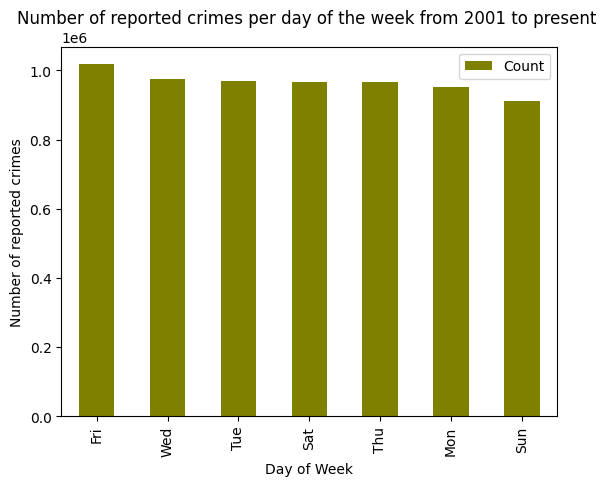

In [214]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day of Week' , y='Count',color='olive')
plt.xlabel('Day of Week')
plt.ylabel('Number of reported crimes')
plt.title('Number of reported crimes per day of the week from 2001 to present ')

## (05-01) RDDs setup

In [264]:
#import findspark
#findspark.init()
from pyspark import SparkContext
sc=SparkContext.getOrCreate()
psrdd=sc.textFile('police-station.csv')
psrdd.first()

'"district","district_name","address","city","state","zip","website","phone","fax","tty","x_coordinate","y_coordinate","latitude","longitude","location"'

In [265]:
ps_header=psrdd.first()

In [271]:
ps_rest=psrdd.filter(lambda line: line!=ps_header)
ps_rest.first()

'"Headquarters","Headquarters","3510 S Michigan Ave","Chicago","IL","60653","http://home.chicagopolice.org",,,,"1177731.401","1881697.404","41.83070169","-87.62339535","(41.8307016873, -87.6233953459)"'

**How many police stations are there?**

In [272]:
ps_rest.map(lambda line: line.split(',')).count()
#ps_rest.map(lambda line: line.split(',')).collect()

24

In [228]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [231]:
ps.select(col('district')).distinct().orderBy('district',ascending=False).show(36)

+------------+
|    district|
+------------+
|Headquarters|
|           9|
|           8|
|           7|
|           6|
|           5|
|           4|
|           3|
|          25|
|          24|
|          22|
|          20|
|           2|
|          19|
|          18|
|          17|
|          16|
|          15|
|          14|
|          12|
|          11|
|          10|
|           1|
| ","Chicago"|
+------------+



**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [284]:
#import findspark
#findspark.init()
from pyspark import SparkContext
sc=SparkContext.getOrCreate()
psrdd=sc.textFile('police-station.csv')
psrdd.first()
ps_header=psrdd.first()
ps_rest=psrdd.filter(lambda line: line!=ps_header)
ps_rest.first()
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5]
                  )).collect())

[]

In [256]:
# Split each line once and store the result
split_lines = ps_rest.map(lambda line: line.split(','))

# Filter lines where the first element is '7'
filtered_lines = split_lines.filter(lambda line: line[0] == '7')

# Map each filtered line to a tuple containing specific elements
mapped_lines = filtered_lines.map(lambda line: (line[0], line[1], line[2], line[5]))

# Collect the processed data
mapped_lines.collect()
#not working in current version

[]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [258]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
map(lambda line : (line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5] )).collect())
#not working in current version

[]

In [279]:
# Import necessary libraries
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read CSV and Select Columns") \
    .getOrCreate()

# Read CSV file into DataFrame
df = spark.read.csv("police-station.csv", header=True)  # Update path_to_your_csv_file.csv with the actual file path

# Show 1st, 3rd, and 5th columns using lambda function
selected_columns = df.rdd.map(lambda row: (row[0],row[1], row[2], row[5])).filter(lambda line: line[0] == '7')

# Display the values
for row in selected_columns.collect():
    print(row)

# Stop SparkSession
spark.stop()

('7', 'Englewood', '1438 W 63rd St', '60636')
